<a href="https://colab.research.google.com/github/Madhavi-sai/FML/blob/main/Logistic_Regression_on_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**



In [ ]:
#Import required packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#Get the data
iris = pd.read_csv('/content/IRIS.csv')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The feature set for our model includes sepal_length,	sepal_width	petal_length,	petal_width	

In [ ]:
X = iris.drop("species", axis = 1).values
y = iris['species'].values

In [ ]:
print(type(X))
print(type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4) (150,)


There are 150 records with four different class labels.

In the below cell we are Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values. Below is the code for it:

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
scalar= StandardScaler()    
X_train= scalar.fit_transform(X_train)    
X_test= scalar.transform(X_test)  

For training or fitting the model to the training set, we will import the LogisticRegression class of the sklearn library.

After importing the class, we will create a classifier object and use it to fit the model to the logistic regression. Below is the code for it:

In [ ]:
#3. Create model and train it
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#attributes of your model
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Our model classifies a test example as any one of the above mentioned class labels.

In [ ]:
model.intercept_

array([-0.06346966,  1.80573429, -1.74226463])

In [ ]:
model.coef_

array([[-0.93454305,  1.20785673, -1.71791943, -1.66111813],
       [ 0.5970608 , -0.5868947 , -0.44257442, -0.77851463],
       [ 0.33748225, -0.62096204,  2.16049385,  2.43963276]])

In [ ]:
#get the actual predictions
y_pred = model.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


**Evaluation**  
The classification report is based upon the following evaluation measures.   Accuracy - The percentage of correctly labelled values out of all the values, from the confusion matrix.  
Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.  
Precision = TP/TP+FP  
Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class.  
Recall = TP/TP+FN  
F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  8]])

Correct predictions:  27  
False predictions: 3

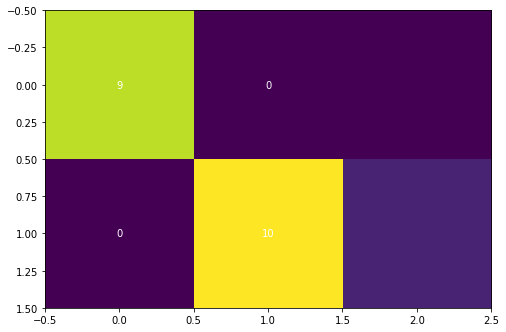

In [ ]:
#visualization of confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# **Conclusion**
Final Conclusion from the confusion matrix.

In [ ]:
#more comprehensive report on the classification 
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.91      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

